In [1]:
import json
import pandas as pd
import glob
import time
from tqdm import tqdm
import sys,os
import collections
import re
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import itertools
import numpy as np
import statistics
import scipy.stats as ss
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
from copy import *

In [2]:
# folder = 'csv_he'
# folder = 'csv_pp_500'
folder = 'csv_b_500'
selection_method = 1
# selection_method = 2
# project = 'he'
# project = 'pp'
project = 'ba'

In [3]:
df_users = pd.read_csv(folder + '/df_users_dom_' + str(selection_method) + '.csv')

In [4]:
df_users.columns

Index(['user_id', 'session_id', 'n_buy', 'buy', 'n_pageviews', 'n_input',
       'n_load', 'n_click', 'n_mouse_click', 'n_rage_click', 'n_mouse_move',
       'n_scroll_move', 'n_wild_mouse', 'n_scrandom', 'n_events', 'n_product',
       'n_non_product', 'n_category', 'n_filter', 'n_search', 'n_cart',
       'effective_duration', 'duration', 'n_sessions', 'country', 'city',
       'continent', 'started_at', 'region', 'day', 'device.type',
       'browser.name', 'os.name', 'referrer1', 'referrer2', 'referrer3',
       'hour', 'day_name', 'city_type', 'load_time', 'buy_hour', 'buy_day',
       'buy_count', 'mean_n_ses_between_buys', 'repeat_buyer',
       'n_sessions_after_1_buy', 'top_product', 'n_top_product',
       'n_unique_product', 'top_category', 'n_top_category',
       'n_unique_category', 'top_product_u', 'n_top_product_u',
       'n_unique_product_u', 'top_category_u', 'n_top_category_u',
       'n_unique_category_u', 'n_add_to_cart', 'n_remove_from_cart',
       'n_next_page'

In [5]:
labeled_column = 'repeat_buyer'
useful_columns = [
    'n_pageviews', 'n_input', 'n_load', 'n_click', 'n_mouse_move', 'n_mouse_click', 'n_rage_click',
    'n_scroll_move', 'n_wild_mouse', 'n_scrandom', 'n_events',
    'n_product', 'n_non_product',
    'n_category',
    'n_filter',
    'n_search',
    'n_cart',
    'n_add_to_cart', 'n_remove_from_cart', 
    'n_next_page', # only He
    'n_sessions',
    'effective_duration', 'duration',
    'user_mean_eff_duration', 'pv_product_mean_eff_duration',
    'load_time',
    'country', 'city', 'continent', 'region', 'city_type',
    'buy_count',
    'n_top_product_u', 'n_top_product', 'n_unique_product_u', 'n_unique_product', 
    'n_top_category_u', 'n_top_category', 'n_unique_category_u','n_unique_category',
    'device.type',
    'browser.name',
    'os.name',
    'referrer1',
    'day_name',
    'hour',   
    'buy_hour',
    'buy_day',
    'mean_price',
#     'mean_rate', # only He
    'n_sessions_after_1_buy',
    'mean_n_ses_between_buys',    
]
numeric_columns = [
    'n_pageviews', 'n_input', 'n_load', 'n_click', 'n_mouse_move', 'n_mouse_click', 'n_rage_click',
    'n_scroll_move', 'n_wild_mouse', 'n_scrandom', 'n_events',
    'n_product', 'n_non_product',
    'n_category',
    'n_filter',
    'n_search',
    'n_cart',
    'n_add_to_cart', 'n_remove_from_cart', 
    'n_next_page',
    'n_sessions',
    'effective_duration', 'duration',
    'user_mean_eff_duration', 'pv_product_mean_eff_duration',
    'load_time',
    'city_type',
    'buy_count',
    'n_top_product_u', 'n_top_product', 'n_unique_product_u','n_unique_product', 
    'n_top_category_u', 'n_top_category', 'n_unique_category_u', 'n_unique_category',
    'hour',   
    'buy_hour',
    'mean_price',
#     'mean_rate', # only He
    'n_sessions_after_1_buy',
    'mean_n_ses_between_buys',   
]
removed_columns = [
    'started_at',
    'referrer2',
    'referrer3',
    'day',
    'n_buy',
    'buy',
    'top_product',
    'top_product_u',
    'top_category',
    'top_category_u' 
]

removed_numeric_columns = [
    'started_at',
    'n_buy',
]
categorical_columns = [c for c in useful_columns if c not in numeric_columns]
removed_categorical_columns = [c for c in removed_columns if c not in removed_numeric_columns]    

In [6]:
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

In [7]:
corr_arr = copy(numeric_columns)
corr_arr.append(labeled_column)

correlation_num = df_users[corr_arr].corr(method = 'pearson')
correlation_num.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

In [8]:
correlation_export = []

correlation_num = df_users[numeric_columns].corrwith(df_users[labeled_column], method = 'pearson')
print('Purchase correlation with continuous features: ')

correlation_export.append('Purchase correlation with continuous features: ')
correlation_export.append(correlation_num)
correlation_export.append('')

correlation_num

Purchase correlation with continuous features: 


n_pageviews                     0.028709
n_input                         0.012714
n_load                          0.038771
n_click                         0.037050
n_mouse_move                    0.029076
n_mouse_click                   0.040160
n_rage_click                   -0.001457
n_scroll_move                   0.048038
n_wild_mouse                    0.002352
n_scrandom                      0.029136
n_events                        0.044083
n_product                       0.028984
n_non_product                   0.008203
n_category                      0.017453
n_filter                       -0.008431
n_search                        0.010570
n_cart                          0.038649
n_add_to_cart                   0.014046
n_remove_from_cart                   NaN
n_next_page                     0.050590
n_sessions                      0.227946
effective_duration              0.044840
duration                        0.033050
user_mean_eff_duration          0.072070
pv_product_mean_

In [9]:
colors = ["#50D4F0", "#AEF06C", "#FACE63"]
sns.set(style="darkgrid")
sns.set_palette(sns.color_palette(colors))

# export plots
pdf = PdfPages('correlation_' + project + '_' + str(selection_method) + '.pdf')
    
def boxplot_visualization(x,y): 
    fig, axes = plt.subplots()
    axes = sns.boxplot(x, y, data=df_users)
    axes.set_yscale('log')
    pdf.savefig(fig)

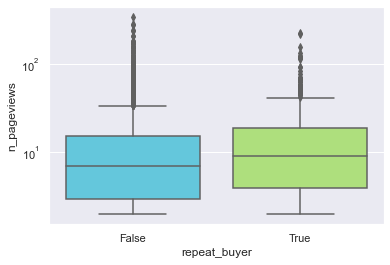

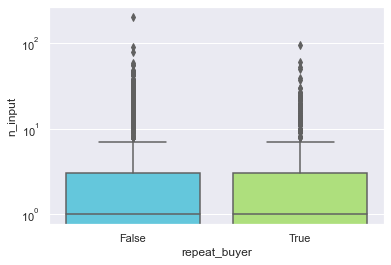

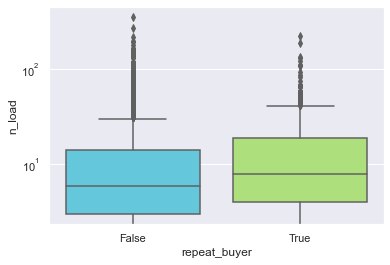

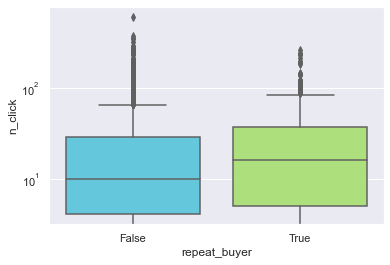

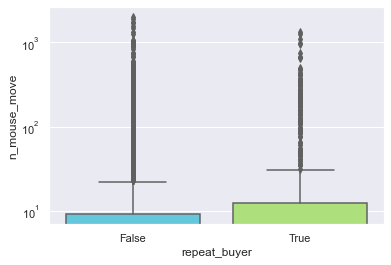

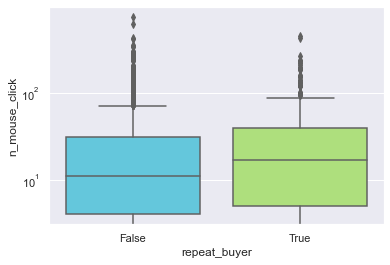

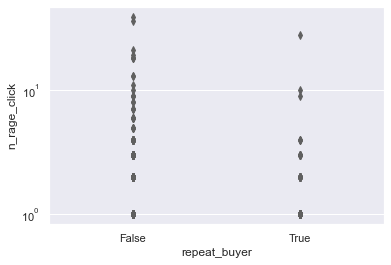

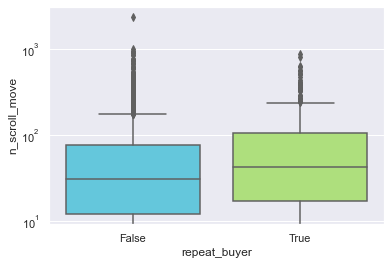

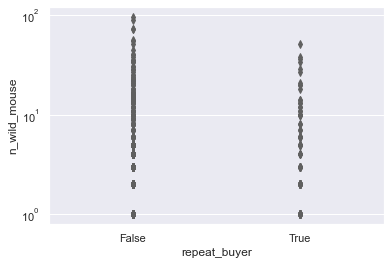

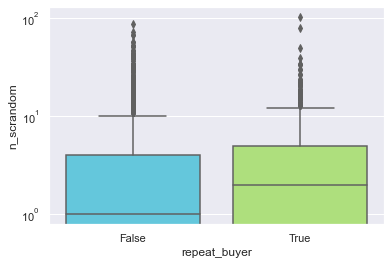

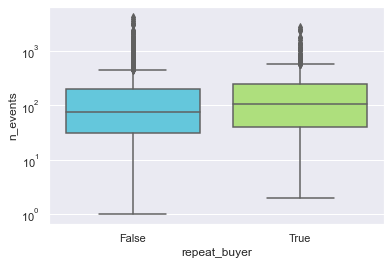

In [10]:
columns = ['n_pageviews','n_input','n_load','n_click','n_mouse_move','n_mouse_click','n_rage_click',
          'n_scroll_move','n_wild_mouse','n_scrandom','n_events']
for c in columns:
    boxplot_visualization('repeat_buyer', c)

<ipython-input-9-67f06c03de47>:11: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axes.set_yscale('log')


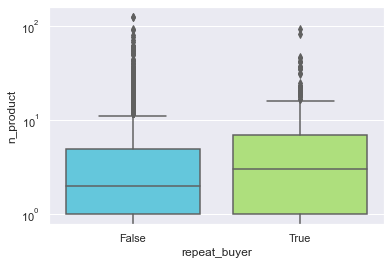

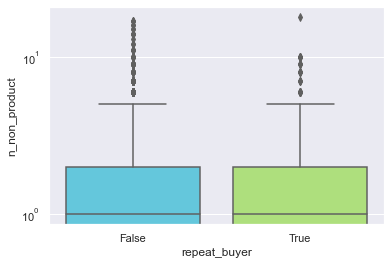

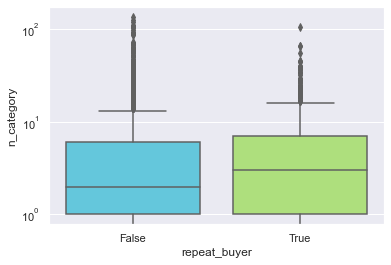

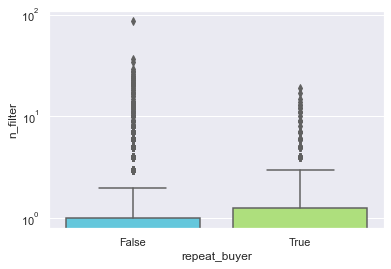

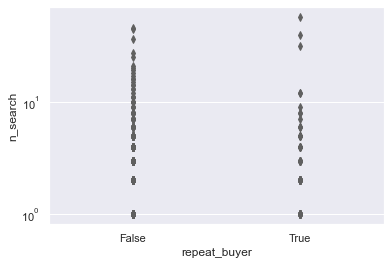

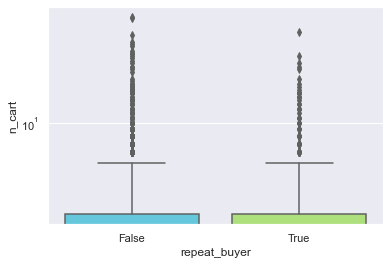

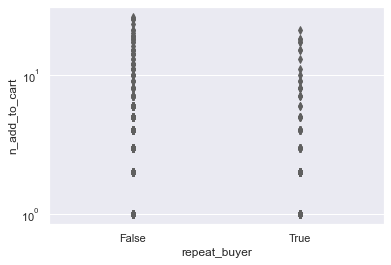

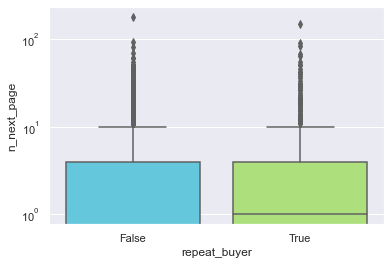

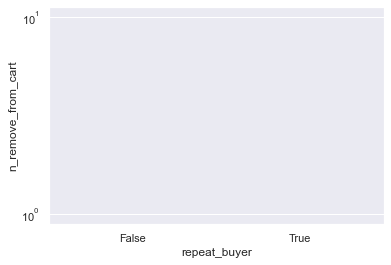

In [11]:
columns = ['n_product','n_non_product','n_category','n_filter','n_search','n_cart','n_add_to_cart',
           'n_next_page',
           'n_remove_from_cart']
for c in columns:
    boxplot_visualization('repeat_buyer', c)

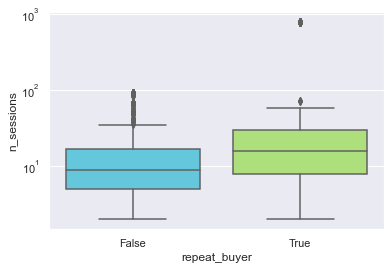

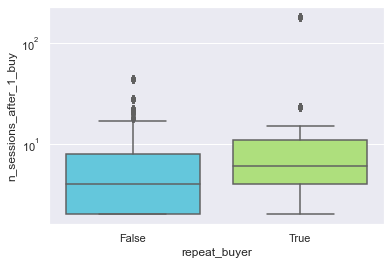

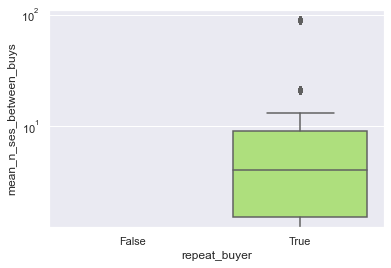

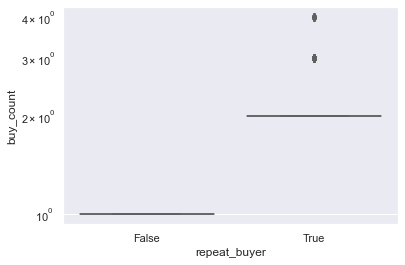

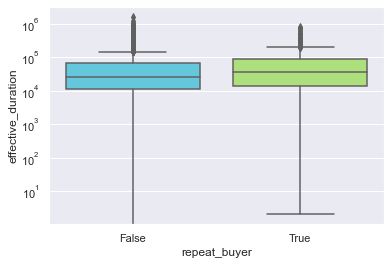

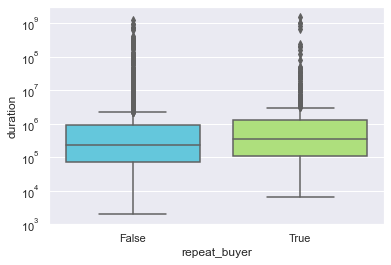

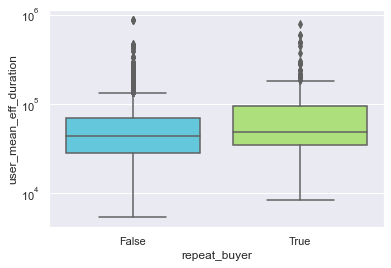

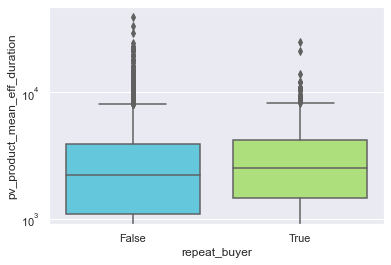

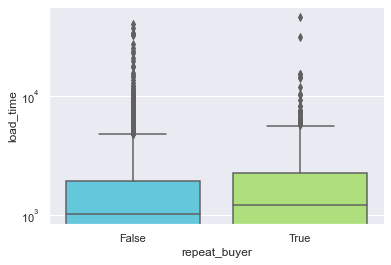

In [12]:
columns = ['n_sessions','n_sessions_after_1_buy','mean_n_ses_between_buys','buy_count','effective_duration','duration',
          'user_mean_eff_duration','pv_product_mean_eff_duration','load_time']
for c in columns:
    boxplot_visualization('repeat_buyer', c)    

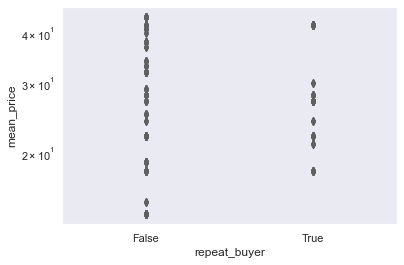

In [13]:
fig, axes = plt.subplots()
axes = sns.boxplot(x="repeat_buyer", y="mean_price", data=df_users)
axes.set_yscale('log')
pdf.savefig(fig)

# fig, axes = plt.subplots()
# axes = sns.boxplot(x="repeat_buyer", y="mean_rate", data=df_users)
# axes.set_yscale('log')
# pdf.savefig(fig)

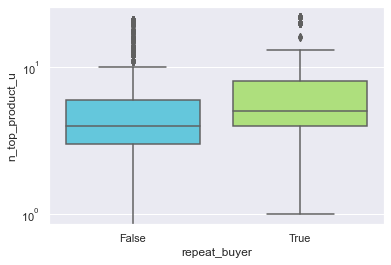

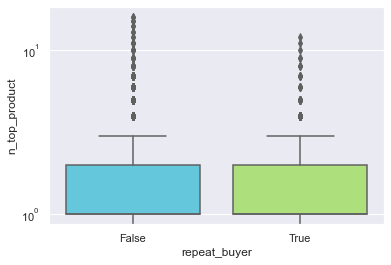

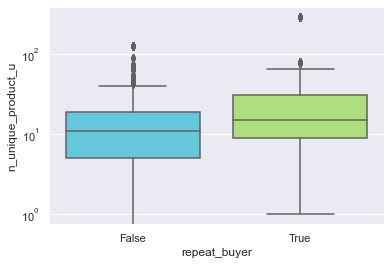

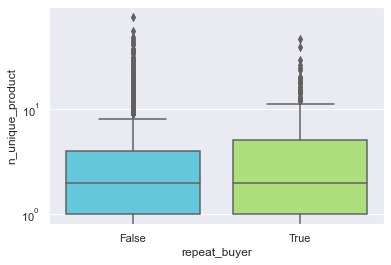

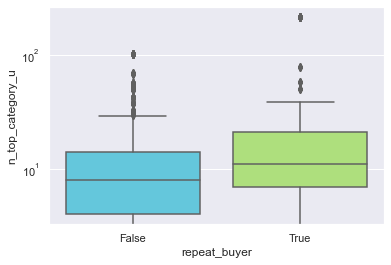

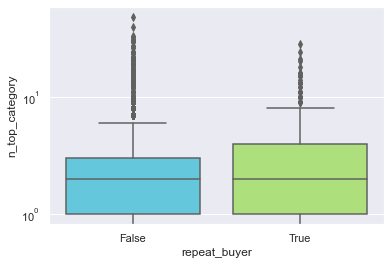

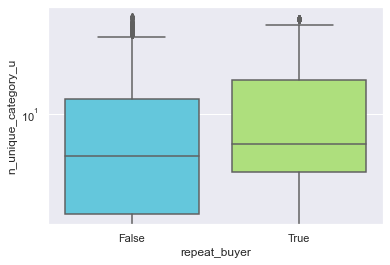

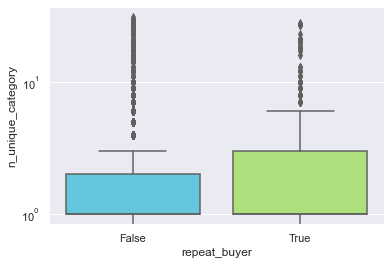

In [14]:
columns = ['n_top_product_u','n_top_product','n_unique_product_u','n_unique_product','n_top_category_u','n_top_category',
          'n_unique_category_u','n_unique_category']
for c in columns:
    boxplot_visualization('repeat_buyer', c)    

In [15]:
pdf.close()

In [16]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

print('Purchase correlation with categorical features: ')
correlation_export.append('Purchase correlation with categorical features: ')

for column in categorical_columns:
    print('Correlation with ' + column + ': ' + str(cramers_v(df_users[column], df_users['repeat_buyer'])))
    correlation_export.append(column + ': ' + str(cramers_v(df_users[column], df_users['repeat_buyer'])))
    

Purchase correlation with categorical features: 
Correlation with country: 0.08878360022339116
Correlation with city: 0.38014174773172793
Correlation with continent: 0.0
Correlation with region: 0.11899445808147151
Correlation with device.type: 0.027469610714307247
Correlation with browser.name: 0.11111785503644574
Correlation with os.name: 0.09886276666918
Correlation with referrer1: 0.05506106970013846
Correlation with day_name: 0.029047832198490282
Correlation with buy_day: 0.052417731910867585


In [17]:
for c in categorical_columns:
    print(c + ': ' + str(len(df_users[c].unique())))

country: 17
city: 375
continent: 3
region: 43
device.type: 3
browser.name: 8
os.name: 5
referrer1: 10
day_name: 7
buy_day: 8
